In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd


In [2]:
# Command to append multiple files in a directory #
## sed 1d 2*.csv > merged.csv *

In [3]:
friends_chars={} 
Rachel=''
Ross=''
Joey=''
Chandler=''
Phoebe=''
Monica=''
with open("transcripts_friends/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Rachel:'):
            Rachel=Rachel+' '+(line[8:])
        elif line.startswith('Ross:'):
            Ross=Ross+' '+(line[6:])
        elif line.startswith('Monica:'):
            Monica=Monica+' '+(line[8:])
        elif line.startswith('Chandler:'):
            Chandler=Chandler+' '+(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe=Phoebe+' '+(line[8:])
        if line.startswith('Joey:'):
            Joey=Joey+' '+(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey





In [13]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 

    
stop_words = set(stopwords.words('english')) 

def clean_data(val):

    word_tokens = word_tokenize(str(val).lower())
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    return list(filtered_sentence)
    



In [4]:
# def plotwordcloud(word):
#     stopwords = set(STOPWORDS) 
#     words = clean_data(str(word).strip('[]'))
#     unique_string=(" ").join(words)

#     wordcloud = WordCloud(width = 800, height = 800, 
#                     background_color ='white', 
#                     stopwords = stopwords, 
#                     min_font_size = 10).generate(unique_string) 
#     # plot the WordCloud image                        
#     plt.figure(figsize = (8, 8), facecolor = None) 
#     plt.imshow(wordcloud) 
#     plt.axis("off") 
#     plt.tight_layout(pad = 0) 
#     plt.show()

In [6]:
df=pd.read_csv("../data/friends_dataset.csv")
df.head()

,Unnamed: 0,Location,Scene,Season,Speaker,Text
0,0,Coffee place,"Joey is there, Chandler is entering",9,Ross,"Ooh, somebody's getting a little fussy."
1,1,Rift’s Restaurant,"as seen in Mad About You, Joey and Chandler a...",1,Chandler,This is unbelievable. It’s been like a half an...
2,2,Monica and Chandler's,"the scene is continued from earlier,",8,Rachel,"Okay, get ready to see some beggin’!"
3,3,Chandler and Joey's,Chandler is laying on the counter and Rachel ...,3,Rachel,"Yes, and grumpy."
4,4,Monica and Rachel's,"Chandler, Rachel, and Joey are eating, and Ph...",2,Phoebe,"Ben, dinner!"


In [9]:
rachel_df=df[df['Speaker']=='Rachel']


In [6]:
len(set(clean_data(str(friends_chars['RACHEL']).strip('[]')))) #unique word count

6125

In [7]:
rachel_corpus=list(set(clean_data(str(friends_chars['RACHEL']).strip('[]'))))
ross_corpus=list(set(clean_data(str(friends_chars['ROSS']).strip('[]'))))
mon_corpus=list(set(clean_data(str(friends_chars['MONICA']).strip('[]'))))
joe_corpus=list(set(clean_data(str(friends_chars['JOEY']).strip('[]'))))
phoebs_corpus=list(set(clean_data(str(friends_chars['PHOEBE']).strip('[]'))))
chandler_corpus=list(set(clean_data(str(friends_chars['CHANDLER']).strip('[]'))))

In [20]:
rachel_corpus=list(set(clean_data(rachel_df.Text)))

In [21]:
from nltk import FreqDist
dist_rach=FreqDist(rachel_corpus)
# dist_mon=FreqDist(mon_corpus)
# dist_joe=FreqDist(joe_corpus)
# dist_ross=FreqDist(ross_corpus)
# dist_phoebs=FreqDist(phoebs_corpus)
# dist_chandler=FreqDist(chandler_corpus)


In [22]:
len(dist_rach)

206

In [23]:
vocab_rach=list(dist_rach.keys())
# vocab_ross=list(dist_ross.keys())
# vocab_mon=list(dist_mon.keys())
# vocab_phoebs=list(dist_phoebs.keys())
# vocab_joe=list(dist_joe.keys())
# vocab_chandler=list(dist_chandler.keys())

In [24]:
vocab_rach[:10]

['uhm',
 'whoops',
 '93272',
 'stove',
 'gon',
 'sexy',
 'ca',
 '93110',
 'whatever',
 '123']

In [25]:
words_rach=[w for w in rachel_corpus if len(w)>3]# and dist_rach[w]>1]
# words_mon=[w for w in mon_corpus if len(w)>3] #and dist_mon[w]>50]
# words_ross=[w for w in ross_corpus if len(w)>3] #and dist_ross[w]>50]
# words_phoebs=[w for w in phoebs_corpus if len(w)>3] #and dist_phoebs[w]>50]
# words_joe=[w for w in joe_corpus if len(w)>3]# and dist_joe[w]>50]
# words_chandler=[w for w in chandler_corpus if len(w)>3]# and dist_chandler[w]>50]

In [26]:
#Normalization and stemming

In [27]:
# import nltk
# porter=nltk.PorterStemmer()
# [porter.stem(t) for t in vocab1]

In [28]:
import nltk

WNLemma=nltk.WordNetLemmatizer()#Lemmatization stemming, but all stems are valid words
stem_freq_words_rach=[WNLemma.lemmatize(t) for t in words_rach]
# stem_freq_words_ross=[WNLemma.lemmatize(t) for t in words_ross]
# stem_freq_words_chandler=[WNLemma.lemmatize(t) for t in words_chandler]
# stem_freq_words_mon=[WNLemma.lemmatize(t) for t in words_mon]
# stem_freq_words_phoebs=[WNLemma.lemmatize(t) for t in words_phoebs]
# stem_freq_words_joe=[WNLemma.lemmatize(t) for t in words_joe]

In [30]:
stem_freq_words_rach

['whoop',
 '93272',
 'stove',
 'sexy',
 '93110',
 'whatever',
 'givi',
 '93239',
 'missed',
 "y'know",
 'rachel',
 'keep',
 '93181',
 'beggin',
 'everybody',
 'chandler',
 'think',
 'perfect',
 '93167',
 'stain',
 'since',
 'okay',
 '93241',
 'meant',
 'ross',
 'grumpy',
 'girl',
 'great',
 'understand',
 'space',
 'text',
 'jill',
 'joey',
 '93287',
 'said',
 '93274',
 'kinda',
 'mahj',
 'word',
 '93288',
 'thing',
 'goodnight',
 'please',
 '93164',
 'respond',
 '17058',
 'well',
 'apartment',
 'anyone',
 'freaking',
 'dropper',
 'else',
 'luck',
 'figured',
 'name',
 'seriously',
 'object',
 'right',
 'appreciat',
 'pheebs',
 'hide',
 '93185',
 '93279',
 'worry',
 'maid',
 '93198',
 '93305',
 'might',
 'thinking',
 'good',
 '93177',
 'ready',
 'diet',
 'mind',
 '93257',
 'care',
 '93209',
 '93127',
 'best',
 '93160',
 'dude',
 '93158',
 'tell',
 'need',
 'saying',
 'emily',
 'promise',
 '93278',
 '93256',
 'coke',
 '93283',
 'time',
 '93162',
 'amazing',
 '93166',
 'number',
 'little

In [18]:
#nltk.pos_tag(vocab1)

In [31]:
s_rachel=""
for w in stem_freq_words_rach:
   s_rachel=s_rachel+' '+w

s_rachel

" whoop 93272 stove sexy 93110 whatever givi 93239 missed y'know rachel keep 93181 beggin everybody chandler think perfect 93167 stain since okay 93241 meant ross grumpy girl great understand space text jill joey 93287 said 93274 kinda mahj word 93288 thing goodnight please 93164 respond 17058 well apartment anyone freaking dropper else luck figured name seriously object right appreciat pheebs hide 93185 93279 worry maid 93198 93305 might thinking good 93177 ready diet mind 93257 care 93209 93127 best 93160 dude 93158 tell need saying emily promise 93278 93256 coke 93283 time 93162 amazing 93166 number little dinne sweet——ooh look minute practically though phoebe 93308 know really honor listen never no-no-no hear 93192 honey length feel also told sweet night cowboy leave hello greatest lonely yeah 93319 taste wait hugsy 93113 mine dtype 93273 better"

In [20]:
s_ross=""
for w in stem_freq_words_ross:
   s_ross=s_ross+' '+w

s_ross

" crossed depressed whilst sprayer exhales makin knockin worrying 'kidney line trapping riding spite disaster sand umm…you gazebo restrung camp nineteen check into… friend…shaking punk yang freakishly exhausted audition not—doesn run sitting handle you—okay anyway… unless down nasal peanut keep baseball distraction complaint her-her night hungry bing- awww several place but.. london… serious piv-ot victoria oohh shelf flower… delay crinkle stack rider maaaaadd girlish janice excuse waste struggling chip glare translates magical toothbrush feel roomy antiquey wango s-who brother american collapse mile exhaling breathes lifted i—mona control fantastic ..oh comedian gal cheese wait-wait dream screwed millennium mini-mall spider bings used lawyer inexcusable pricey ow-ow-ow smelled village s-that do—y'know chandler.. bag beautiful finest complimentary impressed lighting pulling profusion sandy story halen ready mitzi soaking pa-haa listen horror engaged cousin embarassed reader lapdance ma

In [21]:
s_phoebs=""
for w in stem_freq_words_phoebs:
   s_phoebs=s_phoebs+' '+w

s_phoebs

" pre-teen depressed exhales chaotic worrying line riding sand camp check punk impatient exhausted audition run sitting handle hm-mm mustard you—okay inspector anyway… down unless peanut keep baseball drag authority marcia disgust hungry awww twinkly place pharmaceutical croissant serious night-night noodle clint qualified facial scatterbrain janice seductive sleighbells excuse waste struggling glare chip partly translates magical feel scowl brother lifted babysat thankfully phlegm momma control fantastic ..oh potaato cheese wait-wait retardé screwed dream cotton spider 10-4 stalk used lawyer i…i… inexcusable smelled village dish bag beautiful crumbies feburary finest instant pulling exists sandy story wench foster version landlord minus concern robbing gameboy ello listen glabi horror engaged cousin pregnant— reader ring washed officer soap anal stabby window pianist sonic flapping highness dummie rain reaction interrupt g-spot huntley crawl insecure re—you divorce ethel buddy rock fl

In [22]:
s_joe=""
for w in stem_freq_words_joe:
   s_joe=s_joe+' '+w
s_joe

" crossed depressed exhales chaotic makin dogged worrying line riding boiler then- of.. camp check �lright cross-eyed red-haired exhausted audition run sitting handle hm-mm oh-ho-ho orson anyway… unless down peanut focus keep oklahoma baseball parallel jordan out.. casserole her-her night hungry sliding step-ity get… awww place but.. serious oohh clint role facial stack butterwords janice darker excuse waste chip glare oh-whoa feel roomy wango unsuitable brother american rotunda collapse mile phlegm s.a.t journey… momma control u-uch actally cheese wait-wait screwed dream nothing… cotton bings stalk used joey-love bachelor miss…is ordination smelled village s-that bag beautiful receptionist impressed pulling sandy story study noooo… version landlord up.. robbing listen wasting horror there�s reader yeah-eah heartbroken ring genie washed borrowing officer soap needle �hola window pianist mentality headshot wreaks valente rain reaction rocky interrupt talent acceptance breathing insecure

In [23]:
s_chandler=""
for w in stem_freq_words_chandler:
   s_chandler=s_chandler+' '+w
s_chandler

" depressed whilst slammed exhales makin worrying line riding spite sand around… camp check freakishly exhausted audition run sitting handle rollin tineals mustard oh-ho-ho orson unless peanut thought- keep oklahoma baseball drag out.. night hungry sliding majored …betrothed awww several place but.. aaaaaaaaaaaaaaaaaaaaa serious victoria shallow you—i… *job* ingredient night-night plan…no noodle shelf qualified clint stack hoped no-one- winking volume janice excuse waste struggling glare chip magical feel calendar concealed majesty wango hassidic american collapse chan-chan mile exhaling breathes food milne lifted exceptionally cowlicky phlegm finger— fantastic control comedian honoured cheese blanket dream screwed jury huffy orthodox oopsey cotton spider bings used cost-cutting pricey village ticket… s-that dish bag beautiful mooooo ooh-hoo peppiness impressed lighting pulling story ready author thought…maybe…you version sphinx look… soaking bridal man-child listen engaged cousin emba

In [24]:
s_mon=""
for w in stem_freq_words_mon:
   s_mon=s_mon+' '+w

s_mon

" 40th crossed depressed liddy exhales worrying line riding busting sand then- around… weenie camp nineteen check he-he-heads luisa impatient exhausted audition concentrating run sitting handle my—our-our oh-ho-ho unless peanut keep oklahoma handyman casserole her-her night hungry sliding awww place london… serious victoria ingredient noodle facial stack janice seductive excuse waste chip glare pre-bouquet-catching magical feel crumpes s-who anxious s…still mile chan-chan afterthought exhaling diner breathes my-keg-sucking-boyfriend-is-stealing-from-me go-go-go control fantastic cheese blanket wait-wait screwed dream jury millennium spider bings stalk used barca lawyer door. tarragon mnya chilly s-that dish bag beautiful feed crumbies instant lighting pulling story recieved version de-caff landlord concern bridal listen wasting manhole horror engaged cousin hitchhike mistaken nailing ring washed waitwait wringing officer soap needle me—just window viva rain forest reaction wire… invest

In [25]:
#it's an open conversation. Everyone talks to everbody else.
#they all talk in a similar way -mingle well with each other

In [26]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 import Features, EmotionOptions
import pandas as pd
import matplotlib.pyplot as plt

dicti={}
natural_language_understanding = NaturalLanguageUnderstandingV1(
        version='2019-07-12',
        iam_apikey='1erf8hkp6tJpTAVzh8_F7HmyRTWG6Rn9A567j5lyAcaM',
        url='https://gateway.watsonplatform.net/natural-language-understanding/api'
    )
##rachel

response = natural_language_understanding.analyze(
    text=s_rachel,
    features=Features(emotion=EmotionOptions())).get_result()
print(response)
print("Rachel")
print("======================================")
dicti["Rachel"]=response["emotion"]["document"]["emotion"]

print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))

#print(json.dumps(response, indent=2))

##ross
response = natural_language_understanding.analyze(
    text=s_ross,
    features=Features(emotion=EmotionOptions())).get_result()
print("Ross")
print("======================================")
dicti["Ross"]=response["emotion"]["document"]["emotion"]

print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))

##monica
response = natural_language_understanding.analyze(
    text=s_mon,
    features=Features(emotion=EmotionOptions())).get_result()
print("Monica")
dicti["Monica"]=response["emotion"]["document"]["emotion"]

print("======================================")
print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))

##phoebe
response = natural_language_understanding.analyze(
    text=s_phoebs,
    features=Features(emotion=EmotionOptions())).get_result()
print("Phoebe")
dicti["Phoebe"]=response["emotion"]["document"]["emotion"]

print("======================================")
print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))

#chandler
response = natural_language_understanding.analyze(
    text=s_chandler,
    features=Features(emotion=EmotionOptions())).get_result()
print("Chandler")
print("======================================")
dicti["Chandler"]=response["emotion"]["document"]["emotion"]

print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))

#joey
response = natural_language_understanding.analyze(
    text=s_joe,
    features=Features(emotion=EmotionOptions())).get_result()

print("Joey")
print("======================================")
dicti["Joey"]=response["emotion"]["document"]["emotion"]

print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))
print(json.dumps(dicti, indent=2))







{'usage': {'text_units': 5, 'text_characters': 42815, 'features': 1}, 'language': 'en', 'emotion': {'document': {'emotion': {'sadness': 0.567661, 'joy': 0.54612, 'fear': 0.208091, 'disgust': 0.176048, 'anger': 0.202689}}}}
Rachel
{
  "sadness": 0.567661,
  "joy": 0.54612,
  "fear": 0.208091,
  "disgust": 0.176048,
  "anger": 0.202689
}
Ross
{
  "sadness": 0.573058,
  "joy": 0.549802,
  "fear": 0.173308,
  "disgust": 0.179606,
  "anger": 0.523039
}
Monica
{
  "sadness": 0.551049,
  "joy": 0.56306,
  "fear": 0.519255,
  "disgust": 0.500549,
  "anger": 0.209782
}
Phoebe
{
  "sadness": 0.615701,
  "joy": 0.563791,
  "fear": 0.548411,
  "disgust": 0.144454,
  "anger": 0.495543
}
Chandler
{
  "sadness": 0.598047,
  "joy": 0.562449,
  "fear": 0.489693,
  "disgust": 0.168596,
  "anger": 0.467023
}
Joey
{
  "sadness": 0.585463,
  "joy": 0.558585,
  "fear": 0.493941,
  "disgust": 0.492205,
  "anger": 0.197379
}
{
  "Rachel": {
    "sadness": 0.567661,
    "joy": 0.54612,
    "fear": 0.208091,
  

In [179]:
df = pd.DataFrame(dicti)
df
#df.transpose().plot(kind='bar')

,Rachel,Ross,Monica,Phoebe,Chandler,Joey
anger,0.220467,0.187378,0.530853,0.234288,0.510626,0.490749
disgust,0.471921,0.496520,0.491421,0.150606,0.559192,0.458391
fear,0.544006,0.187533,0.478652,0.531690,0.171520,0.515800
joy,0.564692,0.536102,0.534103,0.544813,0.546773,0.552029
sadness,0.547969,0.589937,0.619476,0.591586,0.557909,0.575059


In [180]:
happy_quotient_Rach=df.Rachel.joy/df['Rachel'].sum()
happy_quotient_Ross=df.Ross.joy/df['Ross'].sum()
happy_quotient_Joey=df.Joey.joy/df['Joey'].sum()
happy_quotient_Monica=df.Monica.joy/df['Monica'].sum()
happy_quotient_Phoebe=df.Phoebe.joy/df['Phoebe'].sum()
happy_quotient_Chandler=df.Chandler.joy/df['Chandler'].sum()


In [181]:
sadness_quotient_Rach=df.Rachel.sadness/df['Rachel'].sum()
sadness_quotient_Ross=df.Ross.sadness/df['Ross'].sum()
sadness_quotient_Joey=df.Joey.sadness/df['Joey'].sum()
sadness_quotient_Monica=df.Monica.sadness/df['Monica'].sum()
sadness_quotient_Phoebe=df.Phoebe.sadness/df['Phoebe'].sum()
sadness_quotient_Chandler=df.Chandler.sadness/df['Chandler'].sum()

In [182]:
Disgusting_quotient_Rach=df.Rachel.disgust/df['Rachel'].sum()
Disgusting_quotient_Ross=df.Ross.disgust/df['Ross'].sum()
Disgusting_quotient_Joey=df.Joey.disgust/df['Joey'].sum()
Disgusting_quotient_Monica=df.Monica.disgust/df['Monica'].sum()
Disgusting_quotient_Phoebe=df.Phoebe.disgust/df['Phoebe'].sum()
Disgusting_quotient_Chandler=df.Chandler.disgust/df['Chandler'].sum()

In [183]:
Fear_quotient_Rach=df.Rachel.fear/df['Rachel'].sum()
Fear_quotient_Ross=df.Ross.fear/df['Ross'].sum()
Fear_quotient_Joey=df.Joey.fear/df['Joey'].sum()
Fear_quotient_Monica=df.Monica.fear/df['Monica'].sum()
Fear_quotient_Phoebe=df.Phoebe.fear/df['Phoebe'].sum()
Fear_quotient_Chandler=df.Chandler.fear/df['Chandler'].sum()

In [184]:
Anger_quotient_Rach=df.Rachel.anger/df['Rachel'].sum()
Anger_quotient_Ross=df.Ross.anger/df['Ross'].sum()
Anger_quotient_Joey=df.Joey.anger/df['Joey'].sum()
Anger_quotient_Monica=df.Monica.anger/df['Monica'].sum()
Anger_quotient_Phoebe=df.Phoebe.anger/df['Phoebe'].sum()
Anger_quotient_Chandler=df.Chandler.anger/df['Chandler'].sum()

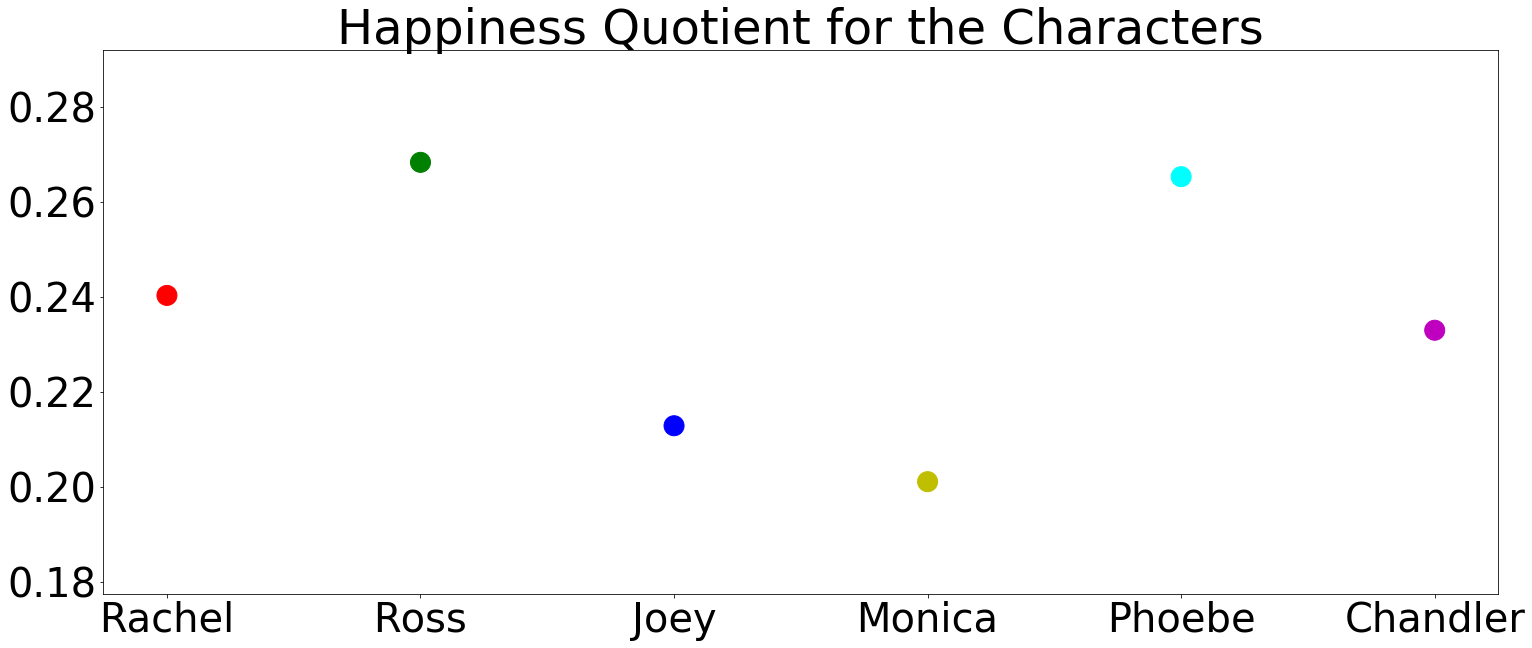

In [185]:
x_happy = ['Rachel','Ross','Joey','Monica','Phoebe','Chandler']
y_happy = [happy_quotient_Rach,happy_quotient_Ross,happy_quotient_Joey,happy_quotient_Monica,happy_quotient_Phoebe,happy_quotient_Chandler]
colors = ['r','g','b','y','cyan','m']
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams.update({'font.size': 40})
plt.scatter(x_happy,y_happy,s=400, c=colors)
plt.title('Happiness Quotient for the Characters')
plt.show()

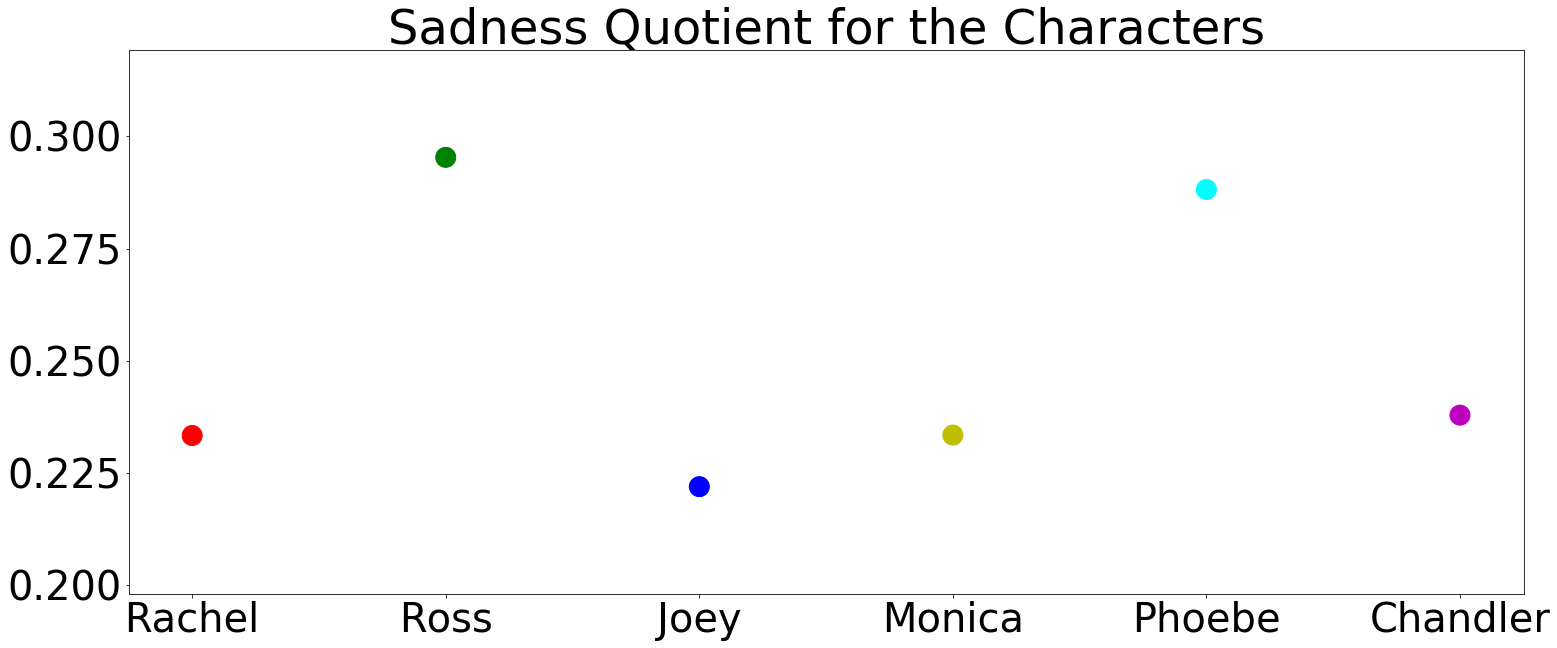

In [186]:
x_sad = ['Rachel','Ross','Joey','Monica','Phoebe','Chandler']
y_sad = [sadness_quotient_Rach,sadness_quotient_Ross,sadness_quotient_Joey,sadness_quotient_Monica,sadness_quotient_Phoebe,sadness_quotient_Chandler]
colors = ['r','g','b','y','cyan','m']
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams.update({'font.size': 40})
plt.scatter(x_sad,y_sad,s=400, c=colors)
plt.title('Sadness Quotient for the Characters')
plt.show()

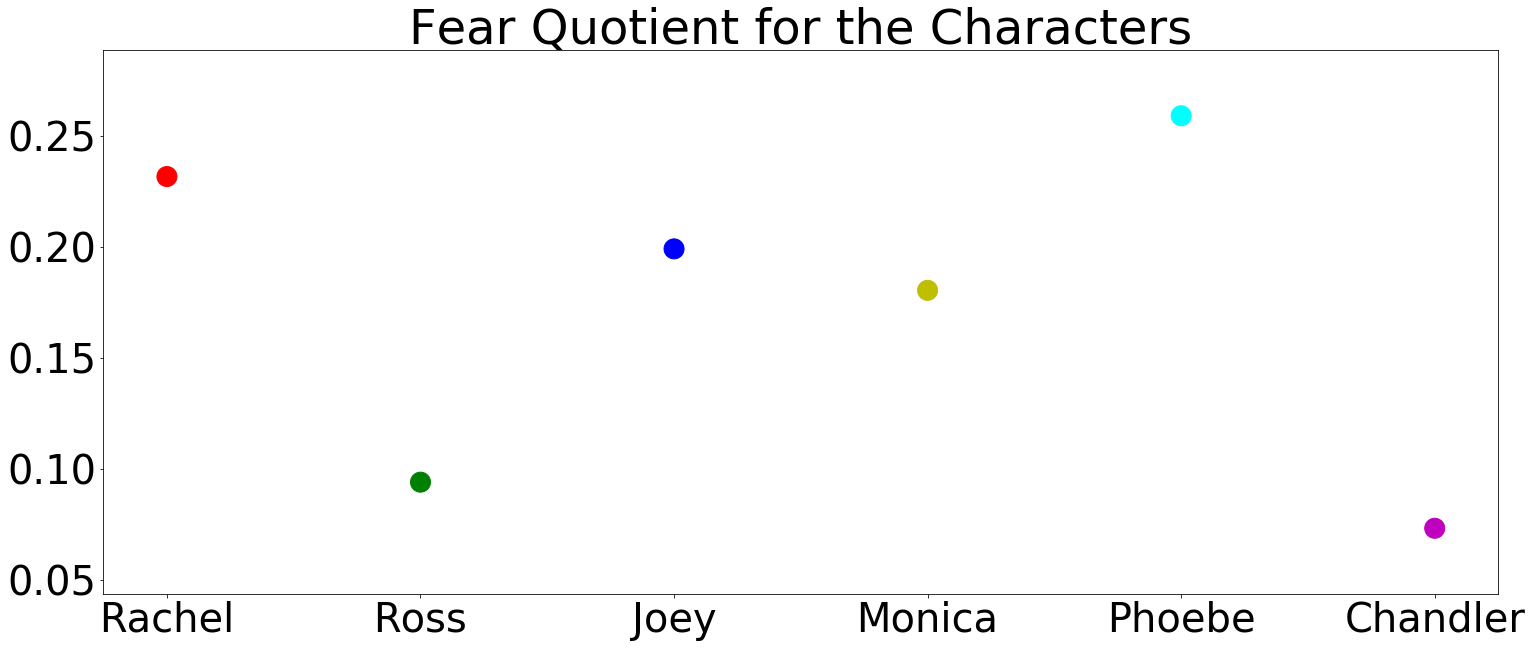

In [187]:
x_fear = ['Rachel','Ross','Joey','Monica','Phoebe','Chandler']
y_fear = [Fear_quotient_Rach,Fear_quotient_Ross,Fear_quotient_Joey,Fear_quotient_Monica,Fear_quotient_Phoebe,Fear_quotient_Chandler]
colors = ['r','g','b','y','cyan','m']
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams.update({'font.size': 40})
plt.scatter(x_fear,y_fear,s=400, c=colors)
plt.title('Fear Quotient for the Characters')
plt.show()

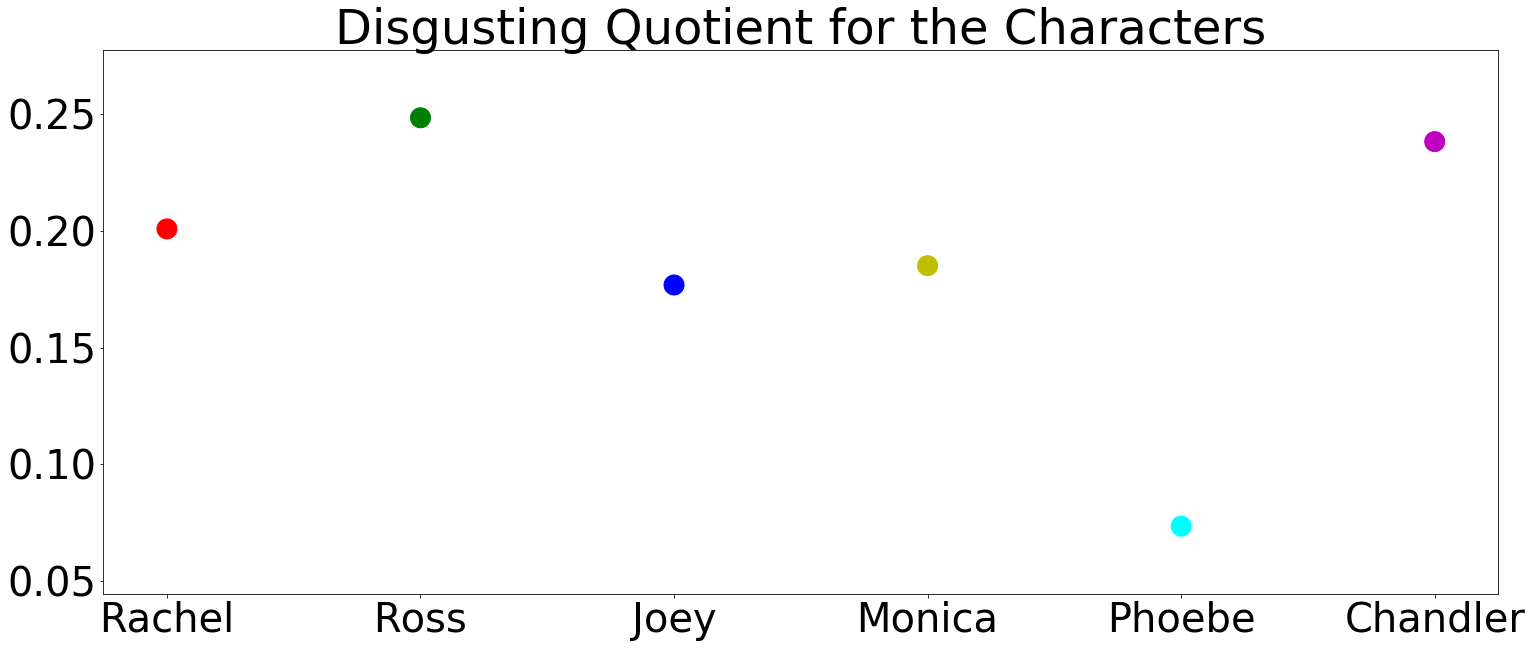

In [188]:
x_disgust = ['Rachel','Ross','Joey','Monica','Phoebe','Chandler']
y_disgust = [Disgusting_quotient_Rach,Disgusting_quotient_Ross,Disgusting_quotient_Joey,Disgusting_quotient_Monica,Disgusting_quotient_Phoebe,Disgusting_quotient_Chandler]
colors = ['r','g','b','y','cyan','m']
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams.update({'font.size': 40})
plt.scatter(x_disgust,y_disgust,s=400, c=colors)
plt.title('Disgusting Quotient for the Characters')
plt.show()

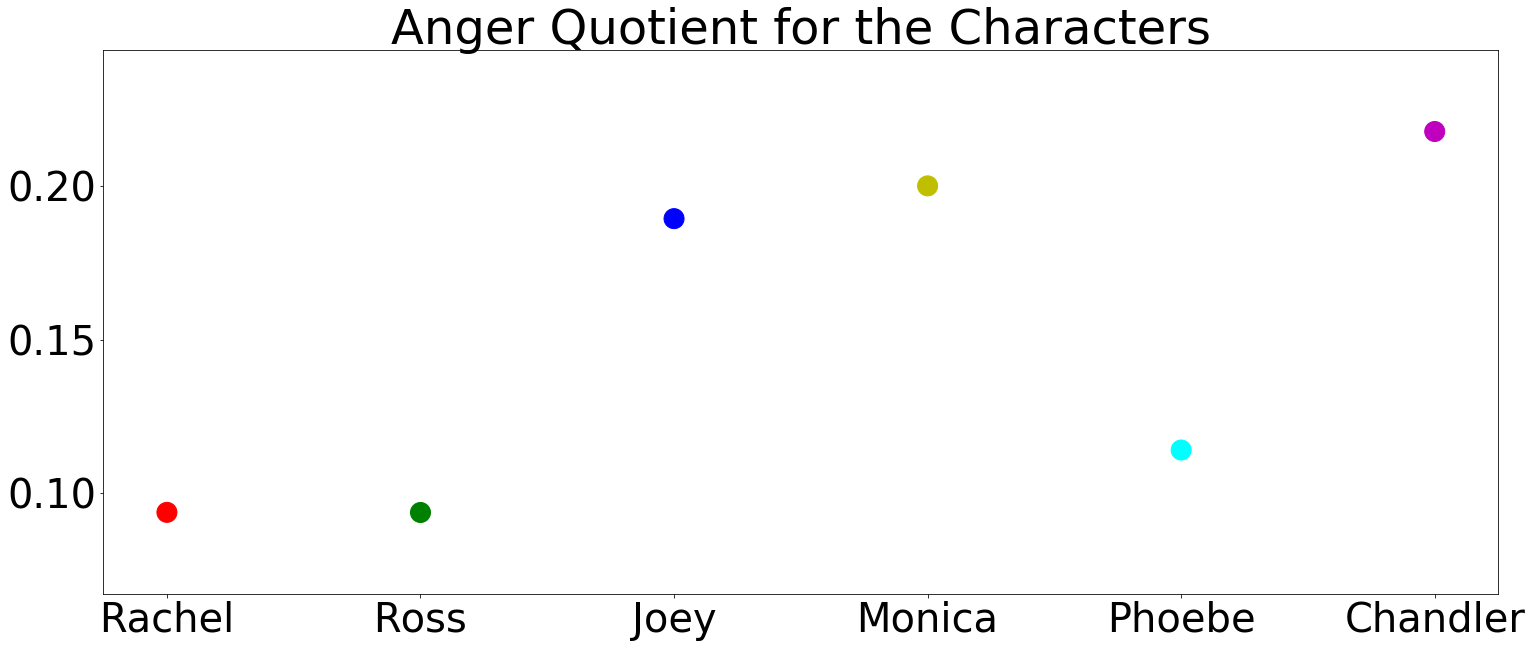

In [189]:
x_anger = ['Rachel','Ross','Joey','Monica','Phoebe','Chandler']
y_anger = [Anger_quotient_Rach,Anger_quotient_Ross,Anger_quotient_Joey,Anger_quotient_Monica,Anger_quotient_Phoebe,Anger_quotient_Chandler]
colors = ['r','g','b','y','cyan','m']
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams.update({'font.size': 40})
plt.scatter(x_anger,y_anger,s=400, c=colors)
plt.title('Anger Quotient for the Characters')
plt.show()

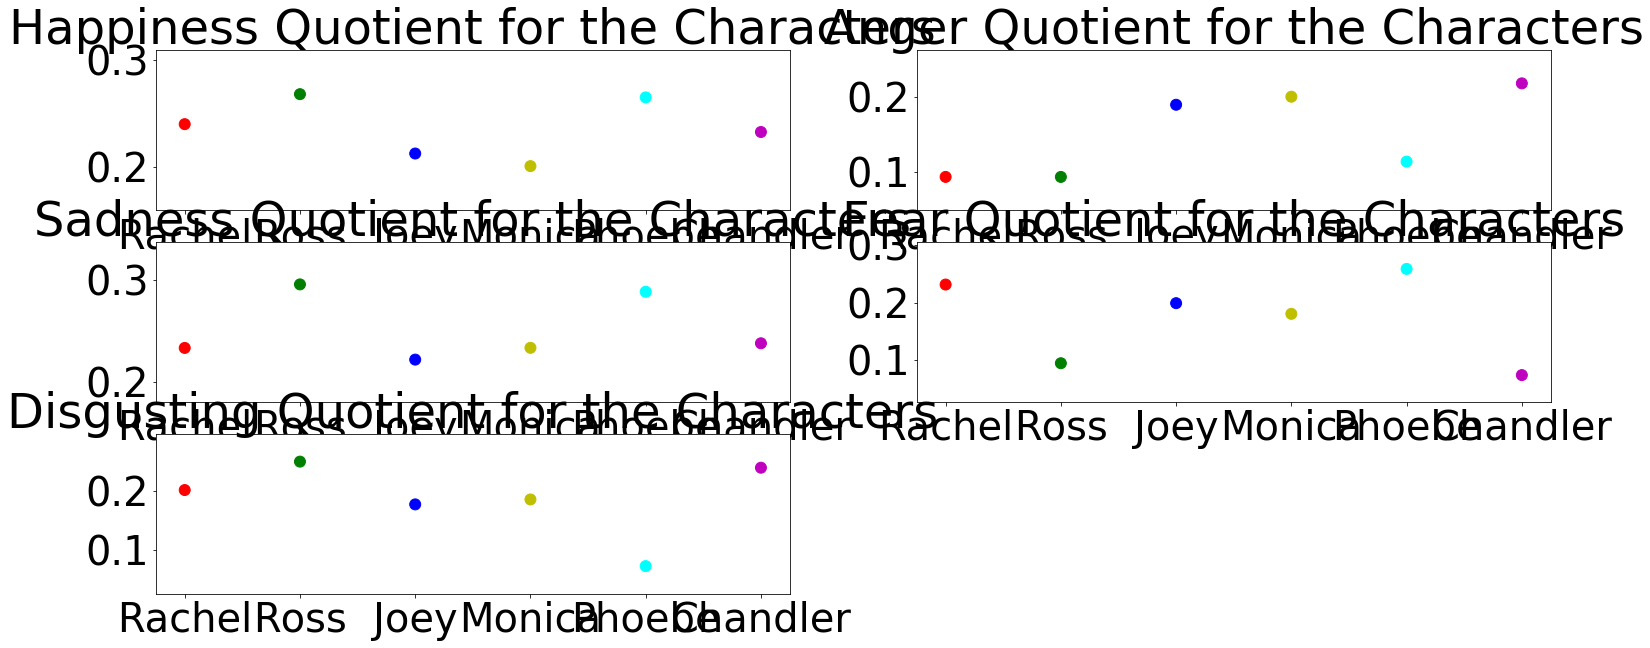

In [190]:
plt.subplot(3, 2, 1)
plt.scatter(x_happy,y_happy,s=120, c=colors)
plt.title('Happiness Quotient for the Characters')

plt.subplot(3, 2, 2)
plt.scatter(x_anger,y_anger,s=120, c=colors)
plt.title('Anger Quotient for the Characters')

plt.subplot(3, 2, 3)
plt.scatter(x_sad,y_sad,s=120, c=colors)
plt.title('Sadness Quotient for the Characters')

plt.subplot(3, 2, 4)
plt.scatter(x_fear,y_fear,s=120, c=colors)
plt.title('Fear Quotient for the Characters')

plt.subplot(3, 2, 5)
plt.scatter(x_disgust,y_disgust,s=120, c=colors)
plt.title('Disgusting Quotient for the Characters')


plt.show()

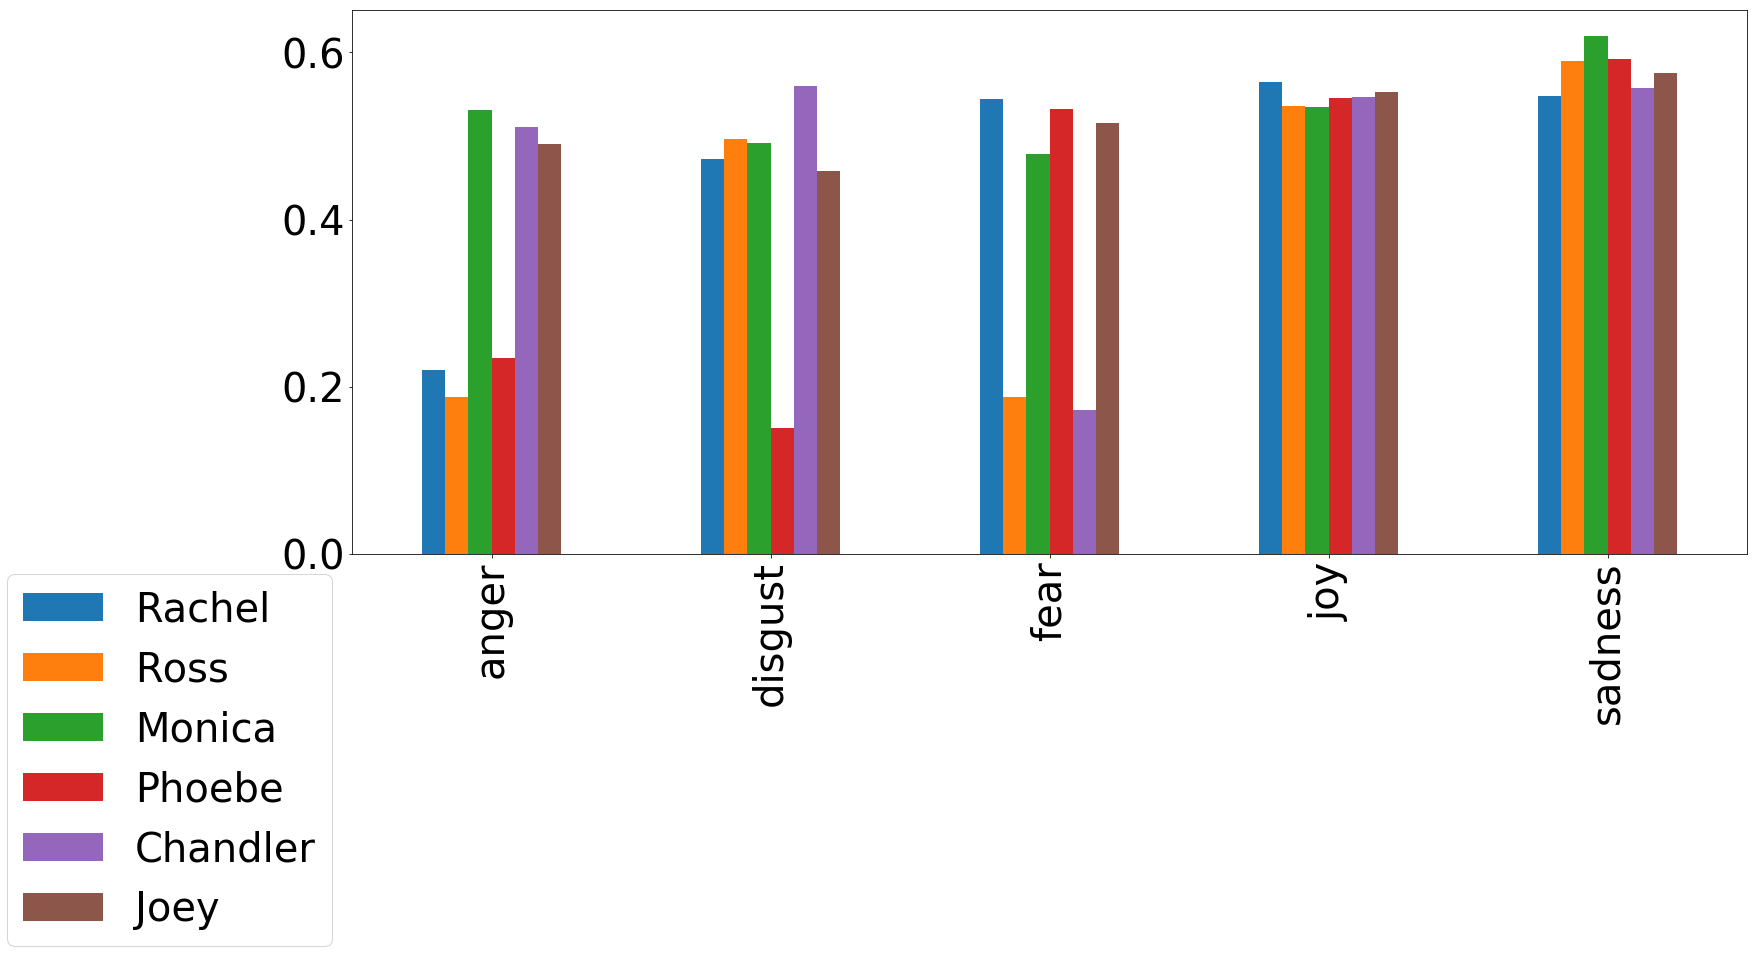

In [191]:
df.plot(kind='bar')
plt.legend(bbox_to_anchor=(0, 0), loc='left', ncol=1)

plt.show()


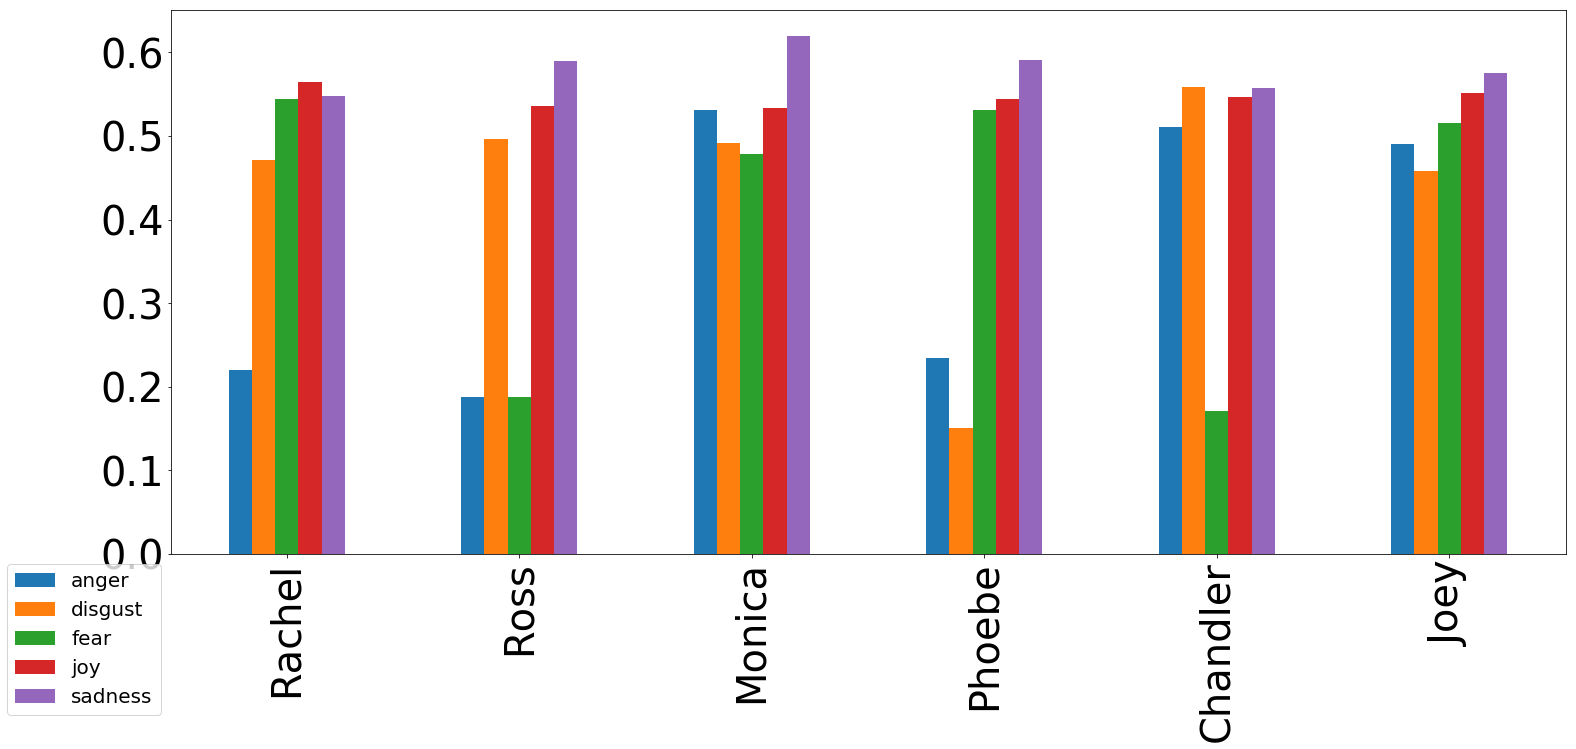

In [192]:
df.transpose().plot(kind='bar')
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams.update({'font.size': 20})

plt.legend(bbox_to_anchor=(0, 0), loc='left', ncol=1)
plt.show()


In [141]:
df1=df.transpose()
df1

,anger,disgust,fear,joy,sadness
Rachel,0.220467,0.471921,0.544006,0.564692,0.547969
Ross,0.187378,0.496520,0.187533,0.536102,0.589937
Monica,0.530853,0.491421,0.478652,0.534103,0.619476
Phoebe,0.234288,0.150606,0.531690,0.544813,0.591586
Chandler,0.510626,0.559192,0.171520,0.546773,0.557909
Joey,0.490749,0.458391,0.515800,0.552029,0.575059


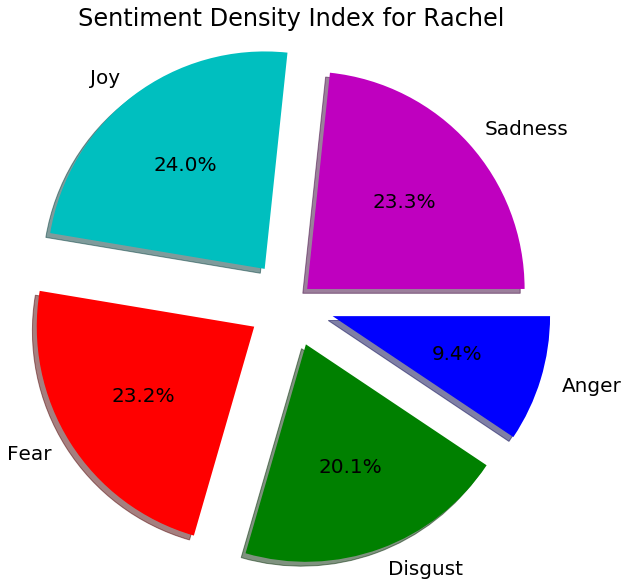

In [142]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.2, 0.2, 0.2, 0.1)
plt.pie(df.Rachel, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Rachel')
plt.show()

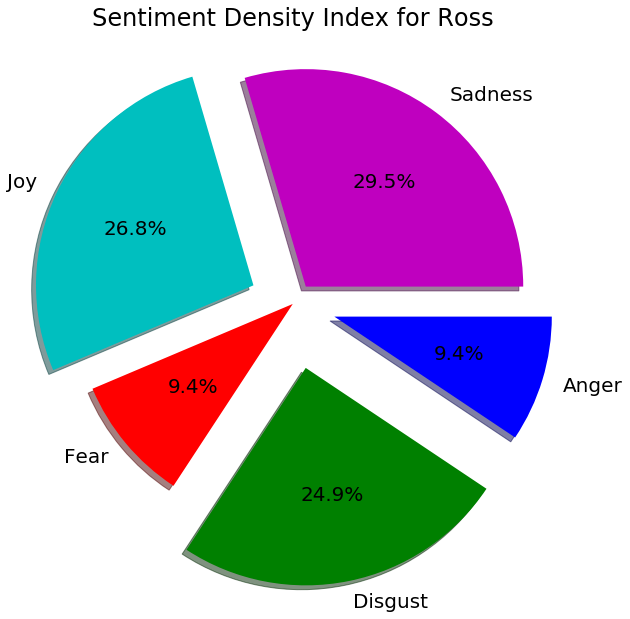

In [143]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Ross, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Ross')
plt.show()

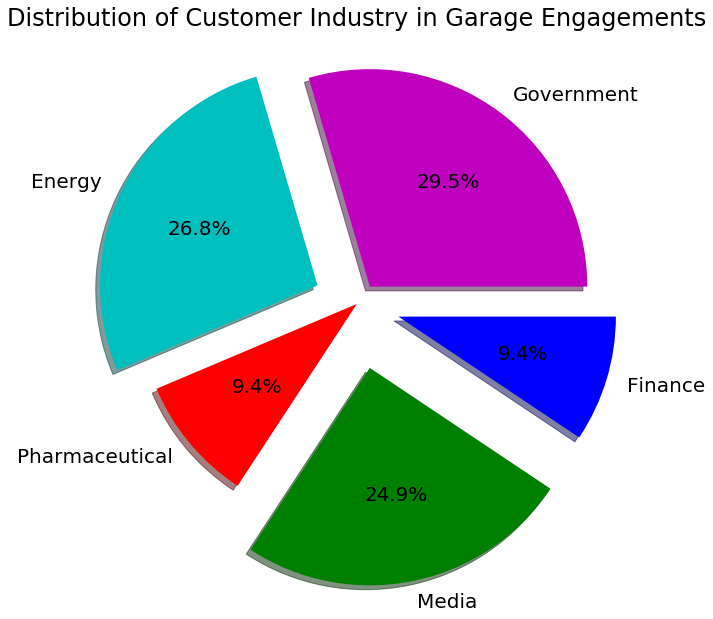

In [193]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Finance', 'Media', 'Pharmaceutical', 'Energy', 'Government']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Ross, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Distribution of Customer Industry in Garage Engagements')
plt.show()

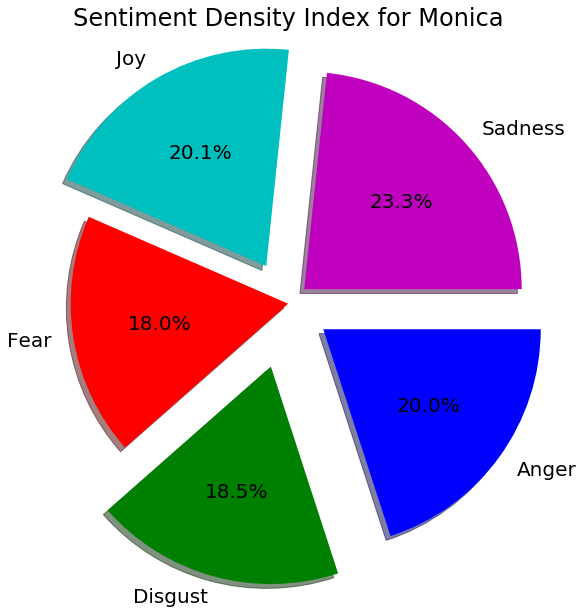

In [144]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Monica, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Monica')
plt.show()

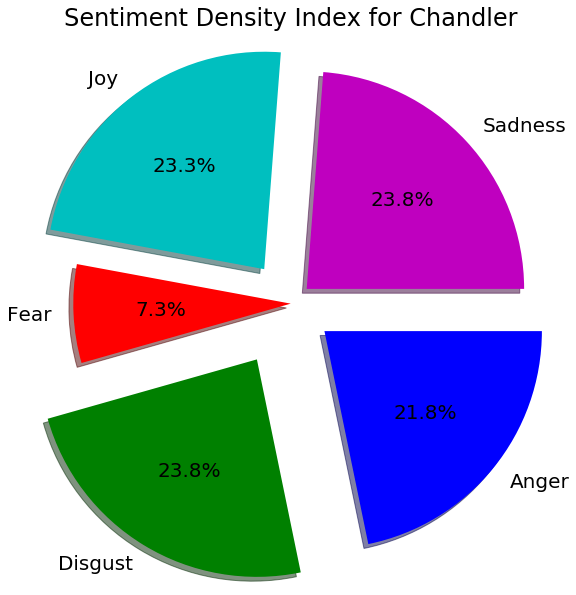

In [145]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Chandler, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Chandler')
plt.show()

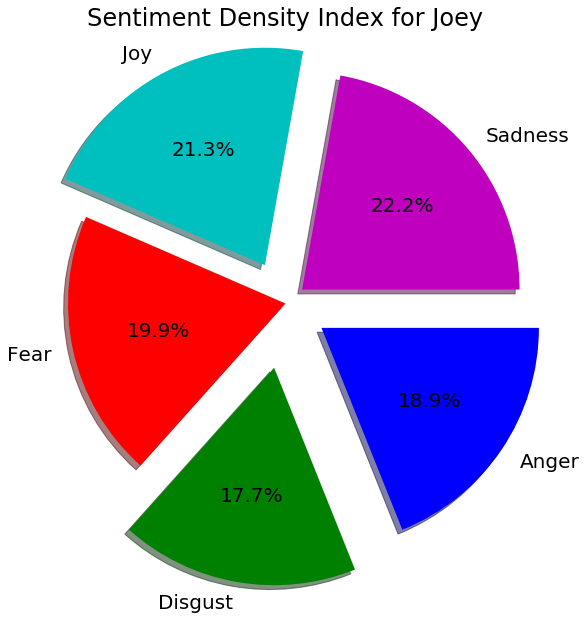

In [146]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Joey, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Joey')
plt.show()

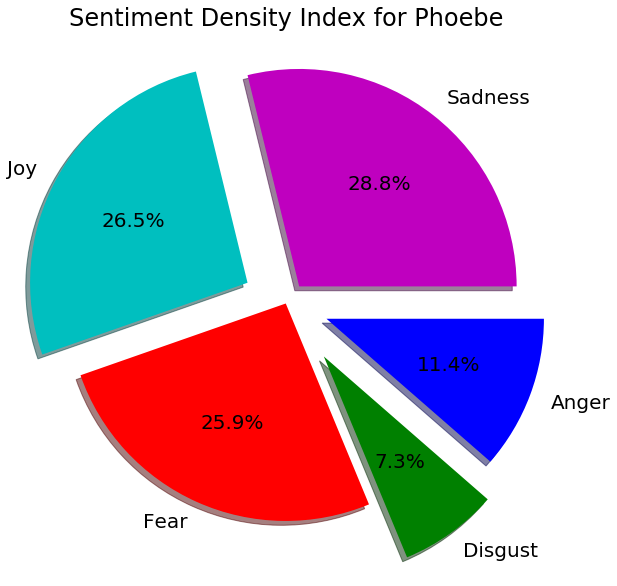

In [147]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Phoebe, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Phoebe')
plt.show()

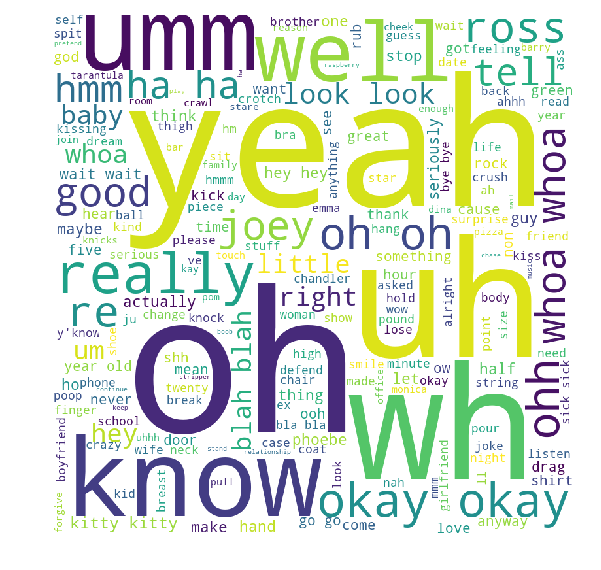

In [149]:
 plotwordcloud(s_rachel)

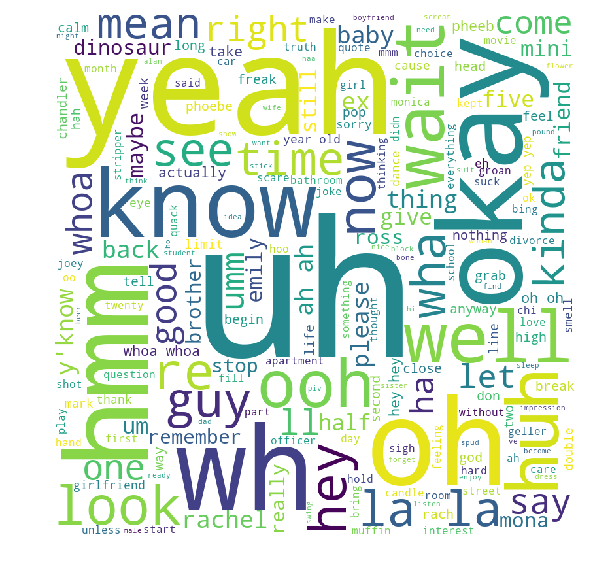

In [150]:
 plotwordcloud(s_ross)

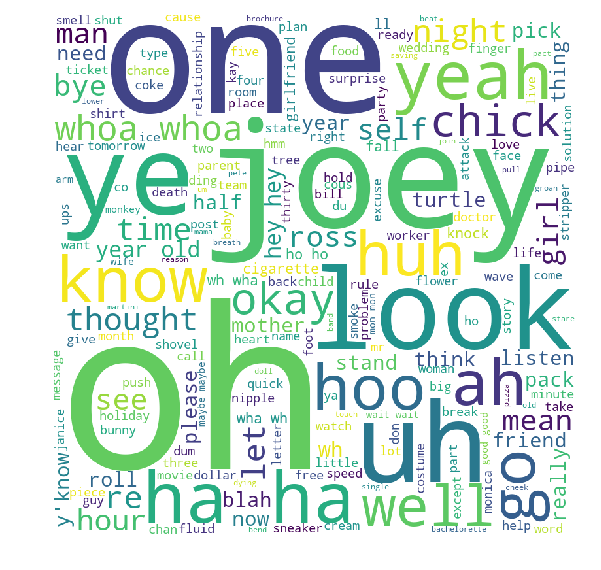

In [148]:
 plotwordcloud(s_chandler)

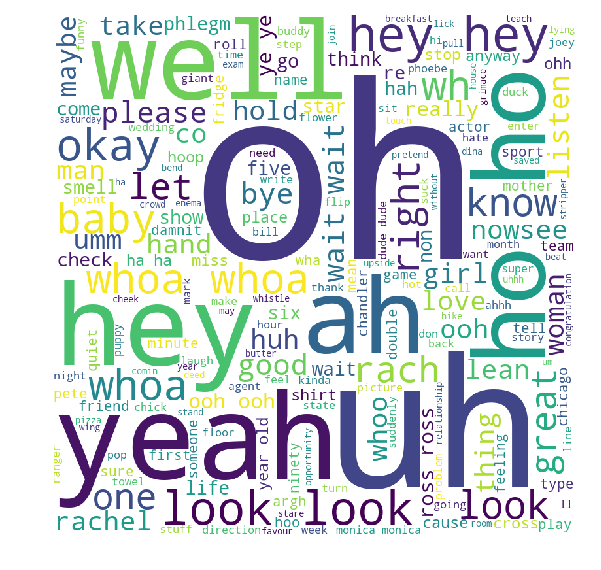

In [151]:
 plotwordcloud(s_joe)

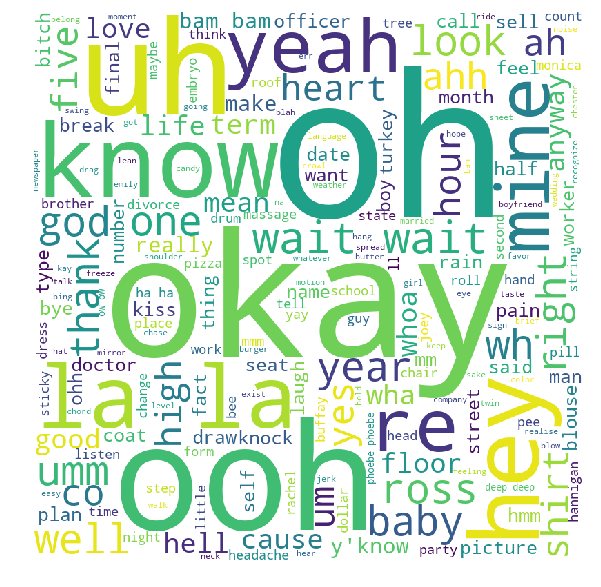

In [470]:
 plotwordcloud(s_phoebs)